In [17]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
sklearn.datasets.load_digits

<function sklearn.datasets.base.load_digits(n_class=10, return_X_y=False)>

Implement a 
- Multi-Layer Perceptron
- Single Hidden Layer

Takes
- data and labels

Decide between
- binary (single output into sigmoid)
- multiclass (multi outputs into softmax)

Two weight matrices
- Input --w-> Hidden --w-> Output
- small initial weights, bias neurons

SGD
- each iteration: 1 random example
- track cross-entropy loss


In [33]:
# P1.
def initializeTheta(in_size, out_size):
    return np.random.rand(in_size, out_size)/100

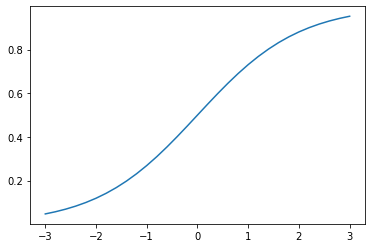

In [29]:
def show_func(f):
    x = np.linspace(-3,3,31)
    plt.plot(x, f(x))
    plt.show()
    return f

# P2.
@show_func 
def logistic(z):
    return 1/ (1+np.exp(-z))

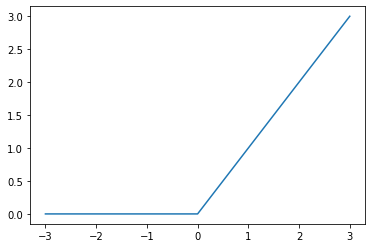

In [31]:
# P3.
@show_func
def relu(z):
    return np.maximum(z, 0)

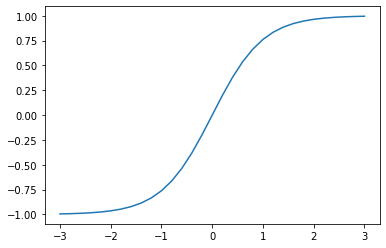

In [251]:
# P4.
@show_func
def tanh(z):
    return 2 / (1 + np.exp(-2*z)) - 1


In [250]:
# P5.

def softmax(x):
    def repeat(col, target):
        return np.c_[(col,)*target.shape[1]]

    e_x = np.exp(x - repeat(np.max(x, axis=1), x))    
    return e_x / repeat(e_x.sum(axis=1), e_x)

def softmax_single_row(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

def sigmoid_derivative(z):
    return z*(1-z)

class MLPClassifier:
    def __init__(self):
        self.Theta1 = NotImplemented
        self.Theta2 = NotImplemented

        def predict(self, X):
            def add_bias(X):
                if len(X.shape)==1:
                    return np.append(X, 1)
                return np.c_[X, np.ones(X.shape[0])]

            # add bias terms, then multiply
            middle = logistic(add_bias(X) @ self.Theta1)
            out = add_bias(middle) @ self.Theta2

            if len(out.shape) == 1:
                out = softmax_single_row(out)
            else:
                out = softmax(out)

            return out
        
    
    def fit(self, X, Y, 
            hidden_layer_neurons=2,
            activation='logistic', 
            regularizer=None, alpha=0.0001,
            learning_rate='constant', learning_rate_init=0.001,
            max_iter=1000, tol=0.0001,
            verbose=False,
            early_stopping=False, validation_fraction=0.1, n_iter_no_change=10,
            **kwargs):
        
        
        output_neurons = 10
        
        # input size plus bias, hidden_layer
        self.Theta1 = initializeTheta(
            X.shape[1]+1,
            hidden_layer_neurons,
        )
        
        self.Theta2 = initializeTheta(
            hidden_layer_neurons+1,
            output_neurons
        )
        
        
        # SGD
        m = X.shape[0]
        i = np.random.randint(0, m)
        i = 0
        
        self.iteration(X[i], Y[i])
#         self.iteration(X[i], Y[i])
    
    
    def iteration(self, input_row, target):
        # add bias, apply Thetas
        input_row = np.append(input_row, 1)
        
        hidden = input_row @ self.Theta1
        hidden = np.append(hidden, 1)
        
        predicted = softmax_single_row(hidden @ self.Theta2)
        
        # get the deltas
        final_error = (target - predicted) 
        final_delta = final_error * sigmoid_derivative(predicted)  # target?
        
        next_error = self.Theta2 @ final_delta.reshape(10, 1)
        next_delta = next_error * sigmoid_derivative(hidden)

        # apply deltas
        print(self.Theta2.shape)
        print(hidden.shape)
        print(final_delta.shape)
        self.Theta2 += hidden.reshape(3, 1) @ final_delta.reshape(1,10)
        
        print(next_delta.shape)
#         self.Theta1 += input_row.reshape(, 1) @ next_delta.reshape()

        
    def predict(self, X):
        pass

# 

X = data['data']
Y = data['target']
one_hot = np.zeros((max(Y.shape), 10))
for i, label in enumerate(Y):
    one_hot[i][label] = 1
# fives = (Y==5).astype(int)
    
c = MLPClassifier()
c.fit(X, one_hot)

[0.10061121 0.10010994 0.09946664 0.09949222 0.09974457 0.10063105
 0.09984638 0.10019481 0.10016434 0.09973886]
(3, 10)
(3,)
(10,)
(3, 3)


In [237]:
c.iteration(X[0], one_hot[0])

[1.00000000e+000 4.75468662e-105 6.40988985e-113 5.16701283e-108
 8.05702681e-107 7.80629594e-105 1.69804607e-111 1.00643475e-099
 9.95174906e-106 2.46371414e-107]


TypeError: iteration() missing 1 required positional argument: 'target_output'

In [74]:
00.5560184855370565907*1797

999.1652185100907

label: 0


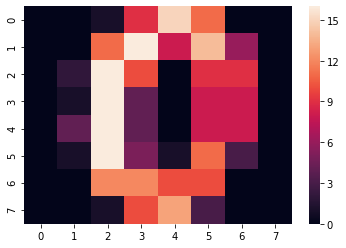

In [47]:
spec = 10
data = sklearn.datasets.load_digits()
a = data['data'][spec]

import seaborn as sns
sns.heatmap(a.reshape((8,8)))

print('label:', data['target'][spec])